In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [68]:
retail = pd.read_csv("/content/drive/MyDrive/Collab DataSets/OnlineRetail.csv", sep=",", encoding="ISO-8859-1", header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [69]:
retail["Amount"] = retail["Quantity"] * retail["UnitPrice"]

In [70]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [71]:
retail.shape

(541909, 9)

In [72]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Amount       541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [73]:
df_null = round(((retail.isnull().sum()/len(retail))*100), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
Amount          0.00
dtype: float64

In [74]:
retail = retail.dropna()
len(retail)

406829

In [75]:
retail["CustomerID"] = retail["CustomerID"].astype(str)

In [76]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 31.0+ MB


In [77]:
rfm_m = retail.groupby("CustomerID")["Amount"].sum()
rfm_m = rfm_m.reset_index()
rfm_m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [78]:
rfm_f= retail.groupby("CustomerID")["InvoiceNo"].count()
rfm_f = rfm_f.reset_index()

rfm_f.columns = ["CustomerID", "Frequency"]

In [79]:
rfm_f

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [80]:
rfm = pd.merge(rfm_m, rfm_f, on="CustomerID", how="inner")

In [81]:
rfm

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [82]:
retail["InvoiceDate"] = pd.to_datetime(retail["InvoiceDate"], format="%d-%m-%Y %H:%M")
retail["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [83]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [84]:
max_date = max(retail["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [85]:
retail["Diff"] =  max_date - retail["InvoiceDate"]
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [86]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   InvoiceNo    406829 non-null  object         
 1   StockCode    406829 non-null  object         
 2   Description  406829 non-null  object         
 3   Quantity     406829 non-null  int64          
 4   InvoiceDate  406829 non-null  datetime64[ns] 
 5   UnitPrice    406829 non-null  float64        
 6   CustomerID   406829 non-null  object         
 7   Country      406829 non-null  object         
 8   Amount       406829 non-null  float64        
 9   Diff         406829 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), timedelta64[ns](1)
memory usage: 34.1+ MB


In [87]:
rfm_p = retail.groupby("CustomerID")["Diff"].min()
rfm_p = rfm_p.reset_index()
rfm_p

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [88]:
rfm_p["Diff"] = rfm_p["Diff"].dt.days
rfm_p

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [89]:
rfm = pd.merge(rfm, rfm_p, on="CustomerID", how="inner")
rfm.columns = ["CustomerID", "Amount", "Frequency", "Recency"]

In [90]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


Text(0.5, 0, 'Attribute')

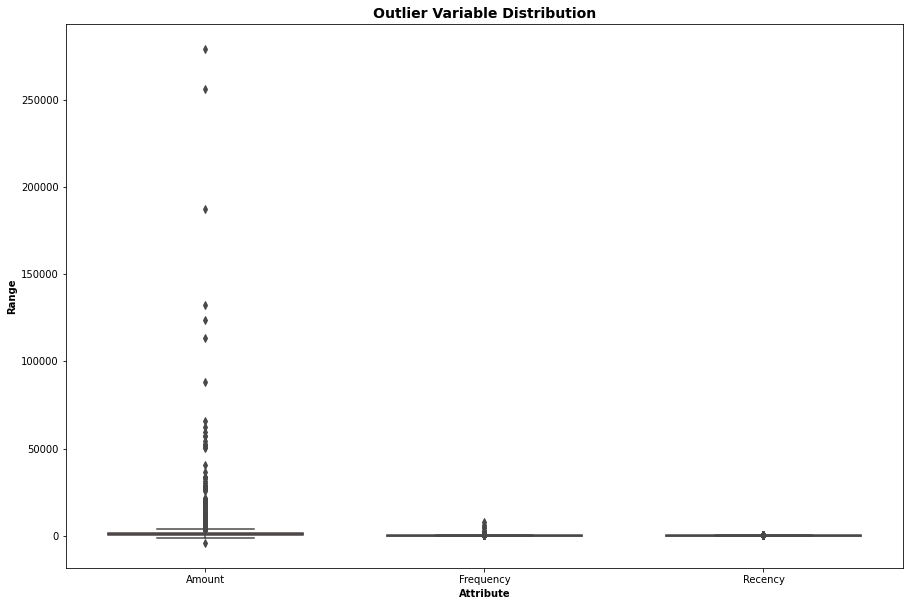

In [91]:
attribute = ["Amount", "Frequency", "Recency"]
# plt.rcParams["figure.figsize"] = [10, 8]
plt.figure(figsize=[15,10])

sns.boxplot(data = rfm[attribute], orient = "v", palette="Set1", whis=1.5, saturation=1, width=0.7)
plt.title("Outlier Variable Distribution", fontsize = 14, fontweight="bold")
plt.ylabel("Range", fontweight="bold")
plt.xlabel("Attribute", fontweight="bold")

In [92]:
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.80)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

In [93]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


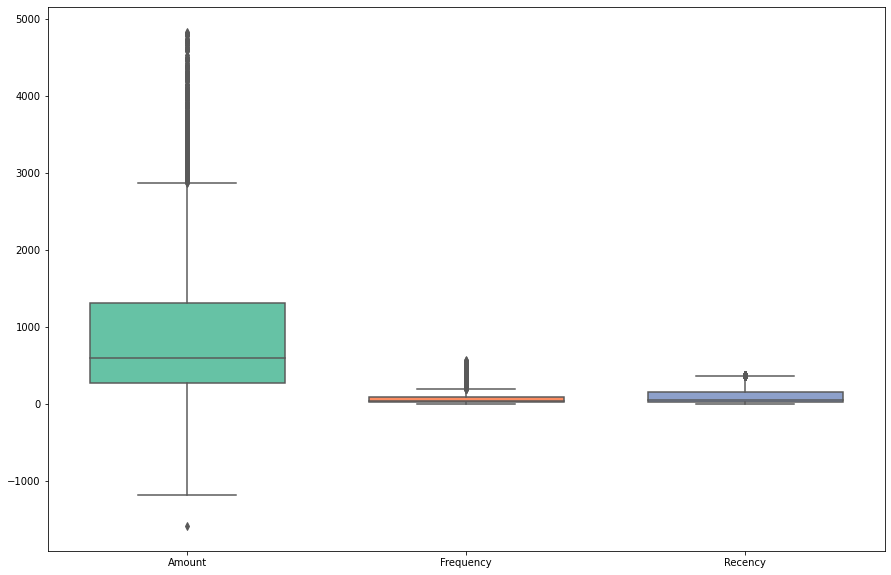

In [94]:
attribute = ["Amount", "Frequency", "Recency"]
plt.figure(figsize=[15,10])

sns.boxplot(data =rfm[attribute], orient = "v", palette="Set2", whis= 1.5, saturation = 1, width=0.7)

In [95]:
rfm_df = rfm[["Amount", "Frequency", "Recency"]]

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)

In [96]:
rfm_df_scaled

array([[-0.96904319, -0.81190421,  2.24519155],
       [ 3.37253245,  1.47249496, -0.93457981],
       [ 0.84136363, -0.44386212, -0.21814985],
       ...,
       [-0.88763109, -0.74844867,  0.82214572],
       [-0.79114939, -0.67230203, -0.87569516],
       [ 0.88169697,  0.05109104, -0.53220134]])

In [97]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled, columns=["Amount", "Frequency", "Recency"])
rfm_df_scaled

,Amount,Frequency,Recency
0,-0.969043,-0.811904,2.245192
1,3.372532,1.472495,-0.934580
2,0.841364,-0.443862,-0.218150
3,0.801383,0.089164,-0.767740
4,-0.632193,-0.621538,2.088166
...,...,...,...
4075,-0.793869,-0.723066,-0.227964
4076,-0.787120,-0.710375,1.774114
4077,-0.887631,-0.748449,0.822146
4078,-0.791149,-0.672302,-0.875695


In [98]:
kmeans = KMeans(n_clusters = 4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
kmeans.labels_

array([2, 3, 0, ..., 2, 1, 0], dtype=int32)

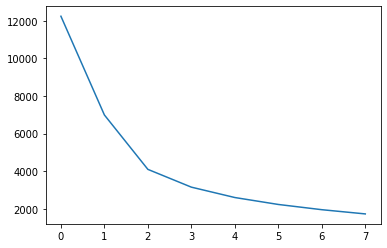

In [100]:
SSD = []
range_clusters = [1,2,3,4,5,6,7,8]

for num_clusters in range_clusters:
  kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
  kmeans.fit(rfm_df_scaled)
  SSD.append(kmeans.inertia_)

plt.plot(SSD)

In [101]:
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters, max_iter = 50)
  kmeans.fit(rfm_df_scaled)
  
  clusters_labels = kmeans.labels_

  silhouette_avg = silhouette_score(rfm_df_scaled, clusters_labels)
  print("For n_clusters{0} the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters2 the silhouette score is 0.4753382631654055
For n_clusters3 the silhouette score is 0.476374416556232
For n_clusters4 the silhouette score is 0.45928630030481304
For n_clusters5 the silhouette score is 0.41514043116058674
For n_clusters6 the silhouette score is 0.38037193029782457
For n_clusters7 the silhouette score is 0.3896856985378403
For n_clusters8 the silhouette score is 0.3579693856486276


In [102]:
kmeans = KMeans(n_clusters= 3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [103]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [104]:
rfm["ClusterID"] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


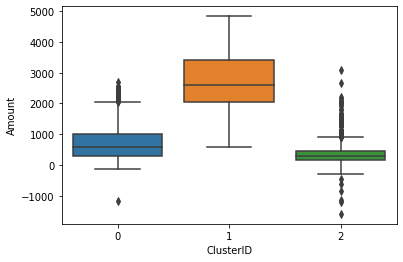

In [105]:
sns.boxplot(x = rfm["ClusterID"], y=rfm["Amount"])

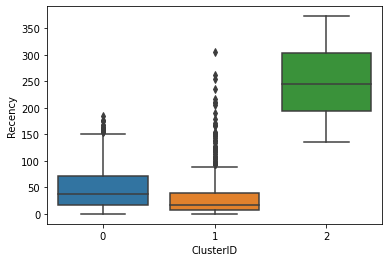

In [106]:
sns.boxplot(x=rfm["ClusterID"], y=rfm["Recency"])

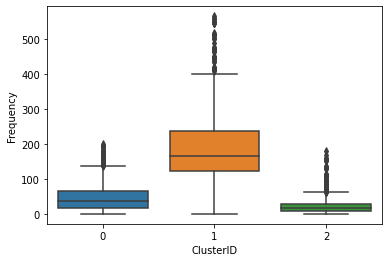

In [107]:
sns.boxplot(x = rfm["ClusterID"], y=rfm["Frequency"])

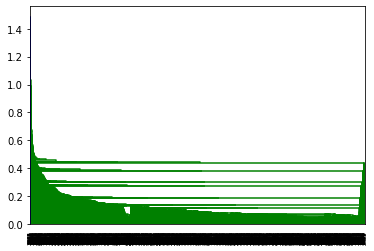

In [108]:
merging = linkage(rfm_df_scaled, method = "single", metric="euclidean")
dendrogram(merging)
plt.show()

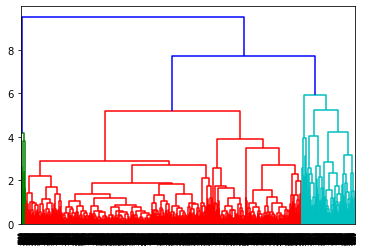

In [109]:
merging = linkage(rfm_df_scaled, method = "complete", metric="euclidean")
dendrogram(merging)
plt.show()

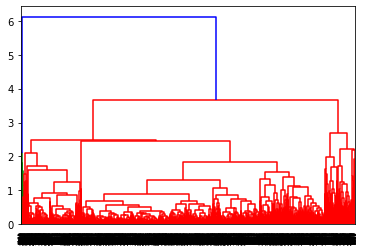

In [110]:
merging = linkage(rfm_df_scaled, method = "average", metric="euclidean")
dendrogram(merging)
plt.show()

In [111]:
cluster_labels = cut_tree(merging, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [112]:
rfm["ClusterID"] = cluster_labels
rfm

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,0
...,...,...,...,...,...
4366,18278.0,173.90,9,73,0
4367,18280.0,180.60,10,277,0
4368,18281.0,80.82,7,180,0
4369,18282.0,176.60,13,7,0


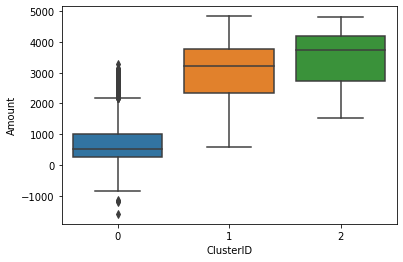

In [113]:
sns.boxplot(x=rfm["ClusterID"], y=rfm["Amount"])

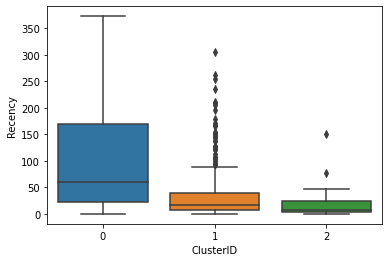

In [114]:
sns.boxplot(x=rfm["ClusterID"], y= rfm["Recency"])

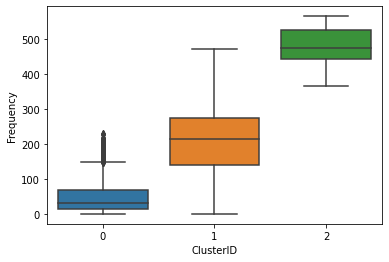

In [115]:
sns.boxplot(x="ClusterID", y="Frequency", data=rfm)